### 분류 모형의 종류

확률적 모형 - 확률을 사용함. 하나의 주어진 데이터에 대해 각 카테고리 혹은 클래스가 정답일 조건부확률을 계산하는 확률적 모형

- 확률적 판별 모형 : 직접 조건부 확률의 모양을 추정 ( 로지스틱 회귀 , 의사결정나무 )
       
- 확률적 생성 모형 : 베이즈정리를 사용하여 간접적으로 조건부 확률을 구함 ( LDA/QDA, 나이브 베이지안)

비확률적 모형

- 판별함수 모형 ( 퍼셉트론, SVM, 인공신경망)

### QDA

QDA(Quadratic Discriminant Analysis)는 조건부확률 기반 생성모형의 하나이다.

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from c

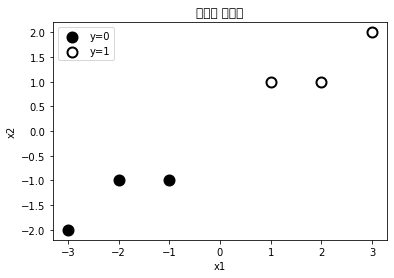

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.title("학습용 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model=QuadraticDiscriminantAnalysis().fit(X, y)

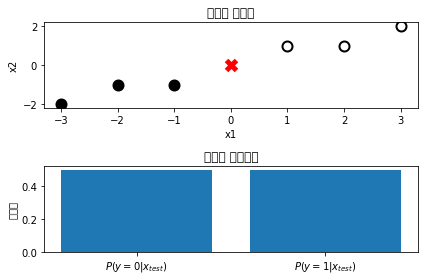

In [13]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("조건부 확률분포")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

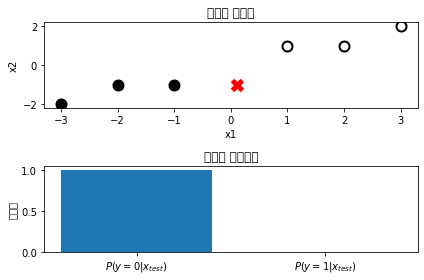

In [15]:
x = [[0.1, -1]]
p = model.predict_proba(x)[0]

import warnings
 
warnings.filterwarnings("ignore")
plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("조건부 확률분포")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("확률값")
plt.tight_layout()
plt.show()


#### 나이브 베이지안 모형

In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

n = 1
x = news.data[n:n + 1]
y = model.predict(x)[0]
print(x[0])
print("=" * 80)
print("실제 클래스:", news.target_names[news.target[n]])
print("예측 클래스:", news.target_names[y])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

실제 클래스: comp.sys.ibm.pc.hardware
예측 

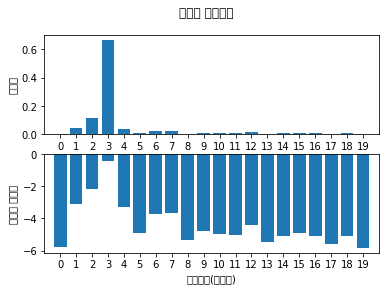

In [17]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률값")
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률의 로그값")
plt.suptitle("조건부 확률분포")
plt.show()

#### 확률적 판별 모형

위에서 보인 QDA나 나이브 베이지안 방법은 베이즈 정리를 사용하는 조건부 확률 기반 생성 모형이었다. 조건부 확률 기반 생성 모형은 조건부확률 $p(y|x) $를 구하기 위해 우선 likelihood$p(x|y)$를 구하고 베이즈 정리를 사용하여 조건부확률을 계산한다.

하지만 확률론적 판별 모형은 조건부확률 $p(y=1|x)$이 $x$에 대한 함수 $f(x)$로 표시될 수 있다고 가정하고 그 함수를 직접 찾아내는 방법이다

$p(y=k|x)=f(x)$

단, 이 함수는 $f(x)$ 0보다 같거나 크고 1보다 같거나 작다는 조건을 만족해야 한다.

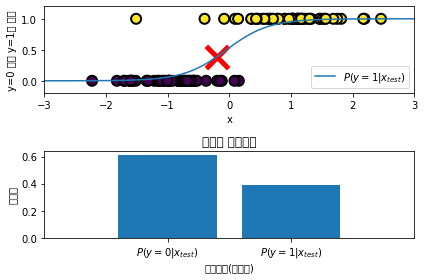

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
X0, y = make_classification(n_features=1, n_redundant=0,
                            n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

x_test = [[-0.2]]

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x_test[0], model.predict_proba(x_test)[0][1:], marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.xlabel("x")
plt.ylabel("y=0 또는 y=1일 확률")
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(x_test)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("조건부 확률분포")
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

#### 판별함수 모형

또다른 분류방법은 동일한 클래스가 모여 있는  영역과 그 영역을 나누는 경계면을 정의하는 것이다. 이경계면은 경계면으로 부터의 거리를 계산하는 $f(x)$ 형태의 함수인 __판별함수(discriminant function)__ 로 정의된다. 판별 함수의 값의 부호에 따라 클래스가 나뉘어진다.

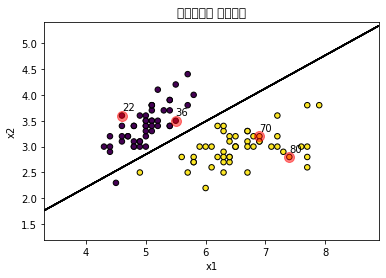

In [27]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
idx = np.in1d(iris.target, [0,2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))
plt.grid(False)
plt.title("퍼셉트론의 판별영역")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

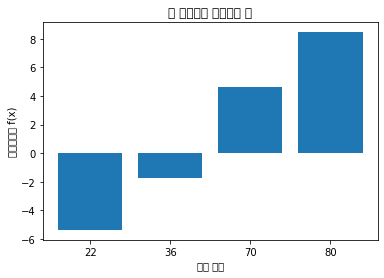

In [28]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("각 데이터의 판별함수 값")
plt.xlabel("표본 번호")
plt.ylabel("판별함수값 f(x)")
plt.show()

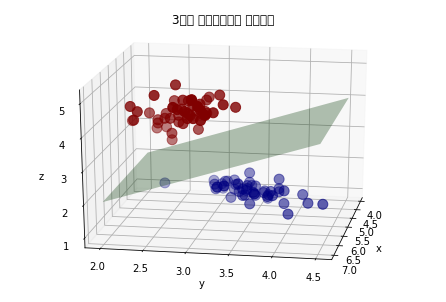

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
import matplotlib as mpl
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]),
                np.array([[2, 4], [2, 4]]), color='g', alpha=.3)
plt.title("3차원 특징데이터의 판별경계")
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("z")
plt.show()

#### 커널 SVM

커널 SVM 을 사용하면 다음과 같이 복잡한 형태의 경계선을 생성할 수도 있다.

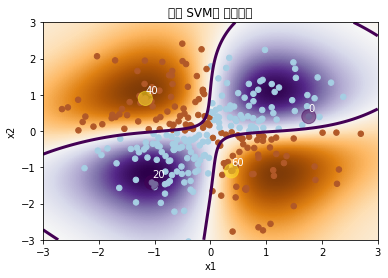

In [31]:

from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("커널 SVM의 판별영역")
plt.show()

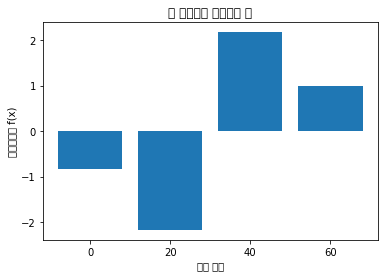

In [32]:

plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.xlabel("표본 번호")
plt.ylabel("판별함수값 f(x)")
plt.title("각 데이터의 판별함수 값")
plt.show()

#### 다중 클래스 분류

확률적 모형은 클래스가 3개 이상인 경우를 다중 클래스(Multi-Class) 분류문제도 풀 수 있지만 판별함수 모형은 종속변수의 클래스가 2개인 경우를 이진 분류문제밖에는 풀지 못한다.
이때는 OvO (One-Vs-One) 방법이나 OvR (One-vs-the-Rest) 방법 등을 이용하여 여러개의 이진 클래스 분류문제로 변환하여 푼다.

### OvO 방법

OvO( One-Vs-One ) 방법은 K 개의 클래스가 존재하는 경우, 이 중 2개의 클래스 조합을 선택하여 K(K-1)/2 개의 이진클래스 분류문제를 풀고 이진 분류문제를 풀어 가장 많은 결과가 나온 클래스를 선택하는 방법이다. 선택받은 횟수로 선택하면 횟수가 같은 경우도 나올 수 있기 때문에 각 클래스가 얻은 조건부 확률값을 모두 더한 값을 비교하여 가장 큰 조건부 확률 총합을 가진 클래스를 선택한다.

### OvR 방법

OvO 방법은 클래스의 수가 많아지면 실행해야 할 이진 분류문제의 수가 너무 많아진다.

OvR(One-vs-the-Rest) 방법은 K개의 클래스가 존재하는 경우, 각각의 클래스에 대해 표본이 속하는지(y=1) 속하지 않는지(y=0)의 이진 분류문제를 푼다. OvO와 달리 클래스 수만큼의 이진 분류문제를 풀면 된다.

OvR 에서도 판별 결과의 수가 같은 동점 문제가 발생할 수 있기 때문에 각 클래스가 얻은 조건부 확률 값을 더해서 이 값이 가장 큰 클래스를 선택한다.

#### 분류 성능평가



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [36]:
confusion_matrix(y_true, y_pred)


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

y_true = [0,0,0,1,1,0,0]
y_pred = [0,0,0,0,1,1,1]

print(classification_report(y_true,y_pred, target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [39]:
from sklearn.metrics import f1_score
f1_score(y_true,y_pred)

0.4

In [41]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.3333333333333333